In [1]:
import numpy as np
from mpl_toolkits import mplot3d
from cntxt import rom_am
from rom_am import ROM
import matplotlib.pyplot as plt

In [2]:
import scipy.io
mat = scipy.io.loadmat('../DATA/CYLINDER_ALL.mat',)

In [18]:
X = mat["UALL"]

In [19]:
pod = ROM(rom="pod")
pod.decompose(X, alg="svd", center =True)

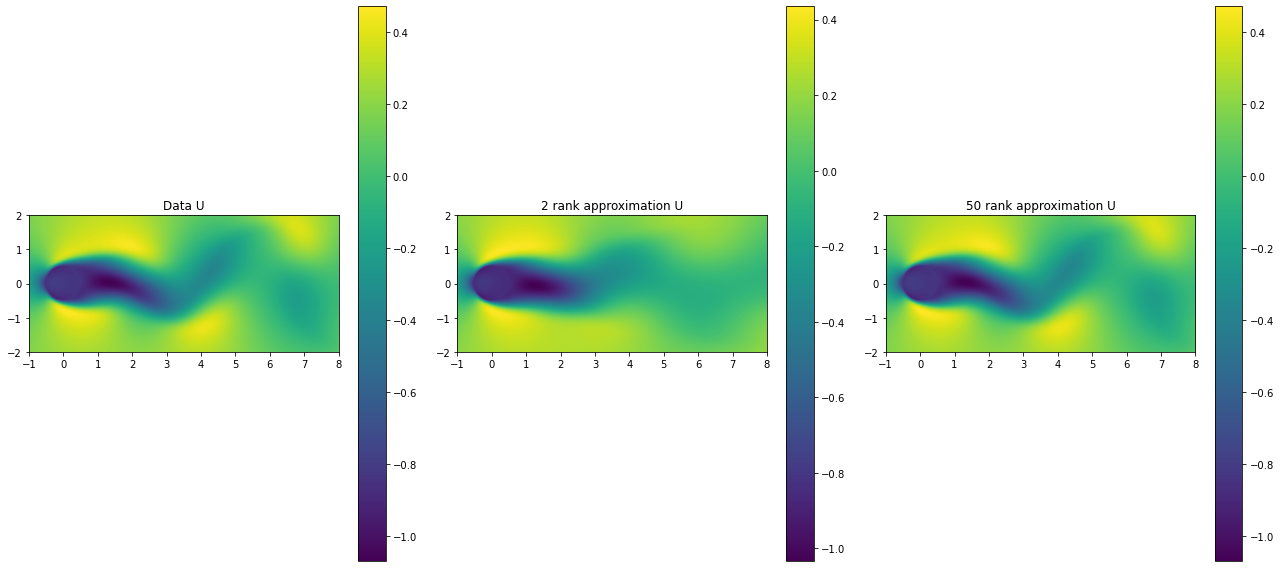

In [20]:
rank1 = 2
rank2 = 50


fig, ax  = plt.subplots(1, 3, figsize = (18, 8))
im = ax[0].imshow(X[:, 0].reshape((199, 449), order = 'F'), extent=[-1, 8, -2, 2]);
fig.colorbar(im, ax=ax[0]);
ax[0].set_title("Data U");

im = ax[1].imshow(pod.approximate(rank1)[:, 0].reshape((199, 449), order = 'F'), extent=[-1, 8, -2, 2]);
fig.colorbar(im, ax=ax[1]);
ax[1].set_title("{} rank approximation U" .format(rank1));

im = ax[2].imshow(pod.approximate(rank2)[:, 0].reshape((199, 449), order = 'F'), extent=[-1, 8, -2, 2]);
fig.colorbar(im, ax=ax[2]);
ax[2].set_title("{} rank approximation U" .format(rank2));

fig.tight_layout();

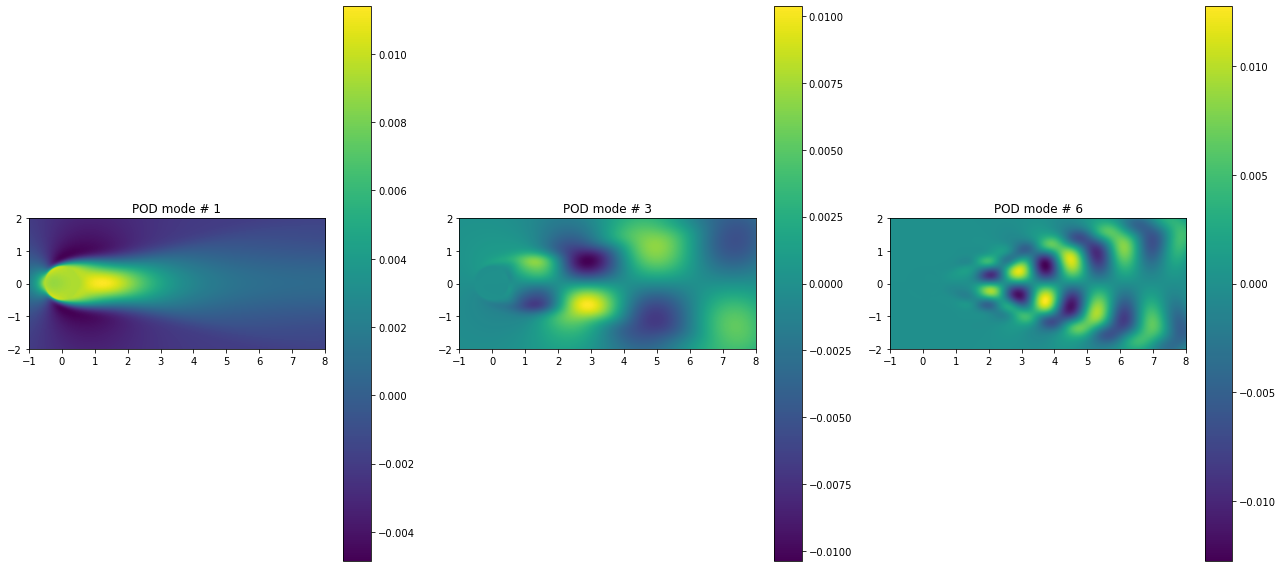

In [22]:
n_mode = [0, 2, 5]

fig, ax  = plt.subplots(1, 3, figsize = (18, 8))

for i in range(len(n_mode)):
    im = ax[i].imshow(pod.modes[:, n_mode[i]].reshape((199, 449), order = 'F'), extent=[-1, 8, -2, 2]);
    fig.colorbar(im, ax=ax[i]);
    ax[i].set_title("POD mode # {}" .format(n_mode[i]+1));


fig.tight_layout();

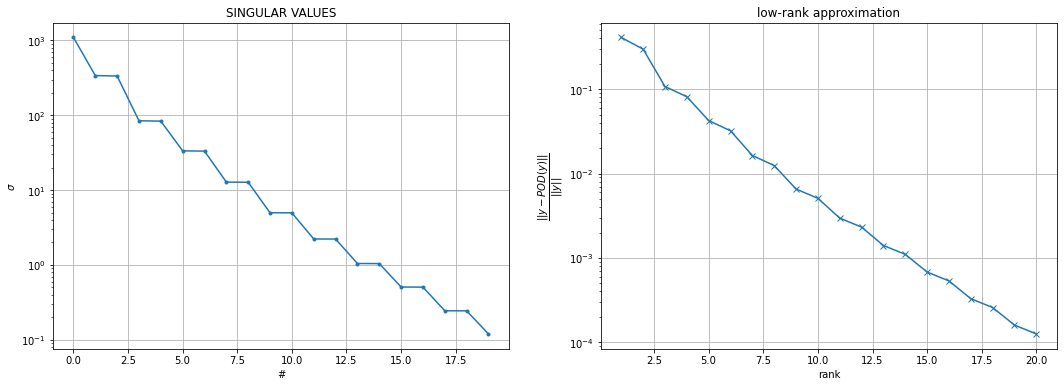

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
y = np.zeros(20)
ranks = np.arange(20)+1
for i in range(20):
    y[i] = np.linalg.norm(X - pod.approximate(i+1))/np.linalg.norm(X)

    
ax[0].semilogy(pod.singvals[:20], '.-')
ax[0].grid();
ax[0].set_ylabel("$\sigma$")
ax[0].set_xlabel("#");
ax[0].set_title("SINGULAR VALUES");

ax[1].semilogy(ranks, y, 'x-')
ax[1].grid();
ax[1].set_ylabel("$\dfrac{||y - POD(y)||}{||y||}$")
ax[1].set_xlabel("rank");
ax[1].set_title("low-rank approximation");

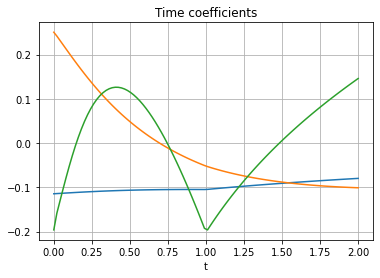

In [7]:
fig = plt.figure()

plt.plot(t, pod.time[0, :])
plt.plot(t, pod.time[1, :])
plt.plot(t, pod.time[2, :])
plt.grid();
plt.title("Time coefficients");
plt.xlabel("t");

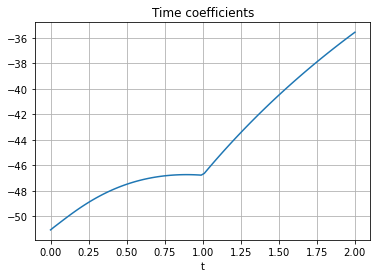

In [8]:
times_ = np.dot(z.T, pod.modes)
fig = plt.figure()

plt.plot(t, times_[:, 0])
plt.grid();
plt.title("Time coefficients");
plt.xlabel("t");